## Wrangle and analyze tweets from WeRateDogs Twitter account (@dog_rates)



## Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Acessing](#acessing)
- [Cleaning](#cleaning)
- [Coding and testing](#coding)
- [Storing](#storing)
- [Anayze and Visualize](#analizing)


<a id='intro'></a>
### Introduction

In this project our main goal is to obtain and analyze the data from the WeRateDogs twitter (@dog_rates). The process of obtaining the data is known as Gather in data science. In these processes we obtained the data provided by Udacity in many formats and some data from twitter's API. Then we acess the data to know how data is, if it is messy, if it has errors and we categorize the types of errors and messys briefly. The next step is is known as clean, where we use python and its libraries to clean and organize this data.

<a id='gather'></a>
#### Gather

To get started, let's import our libraries.

In [1]:
#load our librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
import requests
from matplotlib import pylab
from numpy import arange,array,ones
from scipy import stats
import statsmodels.api as sms
import os
import tweepy
import json
import time
import re
%matplotlib inline

let's import the first dataset that was provide to us, the 'twitter-archive-enhanced.csv'

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1]:
consumer_key = '...'
consumer_secret = '....'
access_token = '....'
access_secret = '....'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Query Twitter's API for JSON data - match to each Tweet ID from the archive
tweet_ids = twitter.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368


Rate limit reached. Sleeping for: 360


680055455951884288


In [8]:
# Store data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [9]:
# Loading the Twitter API data
twitter_api = pd.read_json('tweet_json.txt')
twitter_api['tweet_id'] = tweet_success
twitter_api = twitter_api[['tweet_id', 'favorite_count', 'retweet_count']]

<a id='acessing'></a>
### Acessing


In [10]:
# Display the twitter table
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Some `twitter` columns:
- **tweet_id**: is the last part of the tweet URL after "status/".
- **in_reply_to_status_id**: The ID of an existing status that the update is in reply to. 
- **in_reply_to_user_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.
- **timestamp**: time that was posted.
- **source**: Utility used to post the Tweet, as an HTML.
- **text**: The actual UTF-8 text of the status update;
- **rating_numerator**: The numerator is the top part of a fraction that rates the dog.
- **rating_denominator**: The denominator is the bottom part of a fraction that rates the dog.
- **name**: Name of the dog.
- **doggo**: Type of dog;
- **floofer**: type of dog;
- **pupper**: Type of dog;
- **puppo**: Type of dog.

In [11]:
# Display the images table
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Some `images` columns:
- **tweet_id**: is the last part of the tweet URL after "status/";
- **p1**: is the algorithm's 1º prediction for the image in the tweet;
- **p1_conf**: is how confident the algorithm is in its 1º prediction;
- **p1_dog**: is whether or not the 1º prediction is a breed of dog;
- **p2**: is the algorithm's second most likely prediction;
- **p2_conf**: is how confident the algorithm is in its 2º prediction; 
- **p2_dog**: is whether or not the 2º prediction is a breed of dog. 

In [12]:
# Display the twitter_counts table
twitter_api

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36226,7711
1,892177421306343426,31232,5698
2,891815181378084864,23513,3777
3,891689557279858688,39500,7864
4,891327558926688256,37705,8483
...,...,...,...
2326,666049248165822465,96,39
2327,666044226329800704,272,132
2328,666033412701032449,112,41
2329,666029285002620928,121,42


`twitter_api` columns:
- **tweet_id**: is the last part of the tweet URL after "status/";
- **favorite_count**: number of people who liked the content of the tweet;
- **retweet_count**: number of people who retweet the content of the tweet.

It is better to view this data in a spreedsheet program because Pandas collapses some rows.

In [13]:
#info about twitter table
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# number of unique values in tweet_id 
twitter.tweet_id.nunique()

2356

In [15]:
# uniques names in name columns
twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
#number of unique rating_numerator
twitter.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [17]:
#number of unique rating_denominator
twitter.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [18]:
#Value counts from rating_numerator
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
#Value counts from rating_denominator
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
# unique values from dog types columns
twitter.doggo.unique(), twitter.floofer.unique(), twitter.pupper.unique(), twitter.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [21]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
#info about images table
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# number of unique values in tweet_id 
images.tweet_id.nunique()

2075

In [24]:
sum(images.duplicated())

0

In [25]:
images.img_num.unique()

array([1, 4, 2, 3])

In [26]:
images.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [27]:
images.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [28]:
images.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [29]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [30]:
# number of unique values in tweet_id 
twitter_api.tweet_id.nunique()

2331

In [31]:
sum(twitter_api.duplicated())

0

### Data Quality Issues 

#### Twitter table
- twitter_id is an int;
- missing a lot of data from columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp';
- name_values has 745 None as name and some wrong names like 'his', 'my', 'an', 'a';
- there are retweets that we would like to count;
- timestamp is an object; 
- it is hard to do an overview because there are too many and unnecessary columns;
- some dogs seems to have a wrong rating_numerator because in the text it was a float.

#### Images table
- twitter_id is an int;
- p1, p2 and p3 have underscore where should be a space;
- missing some data.

#### Twitter_counts table
- twitter_id is an int;
- missing some data.


### Tidiness Issues

- the columns doggo, floofer, pupper, puppo should be variables in the same column;
- the three datasets should be just one.

<a id='cleaning'></a>
### Cleaning

In [32]:
# Make copies of the dataframes for cleaning

twitter_clean = twitter.copy()
images_clean = images.copy()
twitter_api_clean = twitter_api.copy()

<a id='Coding'></a>
## Coding and testing

 ### Tidiness Issues

### 1º) Three datasets shoulb be just one

#### Coding
Merge the 3 dataframes into one on tweet_id.

In [33]:
df = [twitter_clean, images_clean, twitter_api]
df_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df)

#### Testing

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

### 2º) Creating a new stage column
#### Coding
Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.

In [35]:
#create a new column stage to store the data from the original dataframe
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [36]:
# clean the text from stage
df_clean.loc[df_clean.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
df_clean.loc[df_clean.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
df_clean.loc[df_clean.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
df_clean.loc[df_clean.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
df_clean.loc[df_clean.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
df_clean.loc[df_clean.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
df_clean.loc[df_clean.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'

In [37]:
#drop the columns doggo, floofer, pupper and puppo
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Testing

In [38]:
#display the options for stage
df_clean.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  jpg_url                     2059 

 ### Quality Issues

### 1º) Column tweet_id is an int
#### Coding
Changing the tweet_id type from int to str.

In [40]:
# Change 'tweet_id' to a string
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

#### Testing

In [41]:
df_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
favorite_count                  int64
retweet_count                   int64
stage       

### 2º) Column timestamp is an object

#### Coding

we should change timestamp for datetime.

In [42]:
#Remove the time zone from the 'timestamp' column
df_clean['timestamp'] = df_clean['timestamp'].str.slice(start=0, stop=-6)

In [43]:
# Change the 'timestamp' column to a datetime object
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Testing

In [44]:
df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3                                    object
p3_conf   

#### Testing

### 3º) deleting retweets 
#### Coding

Keeping only originals twitters (no retweet)

In [45]:
#Keep only the columns where retweeted_status_id is NaN
df_clean = df_clean[np.isnan(df_clean.retweeted_status_id)]

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1987 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1987 non-null   datetime64[ns]
 4   source                      1987 non-null   object        
 5   text                        1987 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1987 non-null   object        
 10  rating_numerator            1987 non-null   int64         
 11  rating_denominator          1987 non-null   int64       

### 4º) Too many unnecessary columns

#### Coding
Using the drop to delete some collumns with missig data.

In [47]:
# drop some columns
df_clean.drop(['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id', 
                   'retweeted_status_user_id', 
                   'retweeted_status_timestamp',
                   'img_num'], axis=1, inplace=True)

#### testing

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1987 non-null   object        
 1   timestamp           1987 non-null   datetime64[ns]
 2   source              1987 non-null   object        
 3   text                1987 non-null   object        
 4   expanded_urls       1987 non-null   object        
 5   rating_numerator    1987 non-null   int64         
 6   rating_denominator  1987 non-null   int64         
 7   name                1987 non-null   object        
 8   jpg_url             1987 non-null   object        
 9   p1                  1987 non-null   object        
 10  p1_conf             1987 non-null   float64       
 11  p1_dog              1987 non-null   bool          
 12  p2                  1987 non-null   object        
 13  p2_conf             1987 non-null   float64     

### 5º) Column name has none instead of NaN
#### Coding
Replace None for NaN with replace function and numpy.

In [49]:
# Replace names None with a NaN
df_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Testing

In [50]:
df_clean[df_clean['name'] == "None"].shape[0]

0

### 6º) Column name has strange values
#### Coding
Replace "wrong" names for NaN.

In [51]:
#replace the wrongs name with NaN
wrong_names = ['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']
df_clean.name = df_clean.name.map(lambda x: 'None' if x in wrong_names else x)

#### Testing

In [52]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'None', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
 

### 7º) Float values in rating_numerator
#### Coding
Change rating_numerator to a float type and correct wrong grades.

In [53]:
# change columns 'rating_numerator' and 'rating_denominator' to float
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [54]:
# find the index for tweets that contain a decimal in numerator of rating
decimals_text = []
decimals_index = []
decimals = []

for i, text in df_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimals_text.append(text)
        decimals_index.append(i)
        decimals.append(re.search('\d+\.\d+', text).group())

In [55]:
# Print the tweets found
decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [56]:
# Print the index found
decimals_index

[40, 548, 603, 1438]

In [57]:
# Change 'rating_numerator' for index that is needed
df_clean.loc[decimals_index[0],'rating_numerator'] = float(decimals[0])
df_clean.loc[decimals_index[1],'rating_numerator'] = float(decimals[1])
df_clean.loc[decimals_index[2],'rating_numerator'] = float(decimals[2])
df_clean.loc[decimals_index[3],'rating_numerator'] = float(decimals[3])

#### Coding

In [58]:
df_clean.loc[603]

tweet_id                                             778027034220126208
timestamp                                           2016-09-20 00:24:34
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
expanded_urls         https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                  11.27
rating_denominator                                                   10
name                                                             Sophie
jpg_url                 https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
p1                                                              clumber
p1_conf                                                        0.946718
p1_dog                                                             True
p2                                                       cocker_spaniel
p2_conf                                                       0.

### 8º) chance underscore  for space in columns p1, p2 and p3
#### Coding
Chance underscore for spaces

In [59]:
#replace underscore for space
df_clean.p1 = df_clean.p1.str.replace('_', ' ')
df_clean.p2 = df_clean.p2.str.replace('_', ' ')
df_clean.p3 = df_clean.p3.str.replace('_', ' ')

#### Testing

In [60]:
df_clean.p1.unique()

array(['orange', 'Chihuahua', 'paper towel', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky', 'limousine',
       'Mexican hairless', 'kuvasz', 'convertible', 'pug',
       'Blenheim spaniel', 'malamute', 'Italian greyhound', 'chow',
       'German shepherd', 'Doberman', 'Eskimo dog', 'Labrador retriever',
       'web site', 'Weimaraner', 'Saluki', 'tusker', 'street sign',
       'miniature pinscher', 'German short-haired pointer',
       'English springer', 'tricycle', 'tabby', 'vizsla', 'bloodhound',
       'Bernese mountain dog', 'West Highland white terrier',
       'cocker spaniel', 'flat-coated retriever', 'Cardigan',
       'Newfoundland', 'basketball', 'Shetland sheepdog', 'komondor',
       'kelpie', 'home theater', 'Greater Swiss Mountain dog',
       'comic book', 'laptop', 'Border collie', 'pole', 'bull mastiff',
       'marmot', 

In [61]:
df_clean.p2.unique()

array(['bagel', 'Pekinese', 'malamute', 'Labrador retriever',
       'English springer', 'Irish terrier', 'Border collie', 'Eskimo dog',
       'Irish setter', 'Cardigan', 'Pomeranian', 'boxer', 'borzoi',
       'Tibetan mastiff', 'pug', 'redbone', 'tow truck',
       'Rhodesian ridgeback', 'sea lion', 'toy terrier', 'Great Pyrenees',
       'sports car', 'Chihuahua', 'shower cap', 'Shih-Tzu',
       'Siberian husky', 'American Staffordshire terrier',
       'Norwich terrier', 'French bulldog', 'malinois',
       'miniature pinscher', 'Chesapeake Bay retriever', 'dhole',
       'Afghan hound', 'Angora', 'Indian elephant', 'umbrella', 'meerkat',
       'beagle', 'vizsla', 'Boston bull', 'window screen', 'whippet',
       'collie', 'Welsh springer spaniel', 'Italian greyhound',
       'Saint Bernard', 'Pembroke', 'Staffordshire bullterrier',
       'miniature poodle', 'black-and-tan coonhound', 'bloodhound',
       'Sussex spaniel', 'golden retriever', 'briard', 'macaque',
       'sandba

In [62]:
df_clean.p3.unique()

array(['banana', 'papillon', 'kelpie', 'spatula',
       'German short-haired pointer', 'Indian elephant', 'ice lolly',
       'Pembroke', 'Chesapeake Bay retriever', 'Chihuahua', 'chow',
       'muzzle', 'basenji', 'Staffordshire bullterrier', 'redbone',
       'Saluki', 'Labrador retriever', 'English setter', 'malamute',
       'bull mastiff', 'Weimaraner', 'shopping cart', 'beagle',
       'can opener', 'Dandie Dinmont', 'car wheel', 'Boston bull',
       'Siamese cat', 'Bernese mountain dog', 'kuvasz', 'Eskimo dog',
       'Norfolk terrier', 'Brabancon griffon', 'Norwegian elkhound',
       'Newfoundland', 'dingo', 'flat-coated retriever', 'Cardigan',
       'cocker spaniel', 'golden retriever', 'koala', 'Persian cat',
       'ibex', 'traffic light', 'clumber', 'bath towel', 'Egyptian cat',
       'American Staffordshire terrier', 'Ibizan hound', 'Appenzeller',
       'toy terrier', 'bathtub', 'Tibetan mastiff',
       'Greater Swiss Mountain dog', 'vizsla', 'Great Pyrenees',
     

In [63]:
df_clean.p1.value_counts()

golden retriever       139
Labrador retriever      93
Pembroke                88
Chihuahua               79
pug                     54
                      ... 
peacock                  1
polecat                  1
beach wagon              1
crash helmet             1
American black bear      1
Name: p1, Length: 374, dtype: int64

<a id='storing'></a>
## Storing


In [64]:
# Storing the new df_clean df to a new csv file
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='analizing'></a>
## Analyze and Visualize

In [65]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [66]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03,1987.000000,1987.000000
mean,7.356264e+17,12.236930,10.533971,0.593317,1.344725e-01,6.037114e-02,8274.142426,2456.387519
std,6.739210e+16,41.544174,7.333532,0.271959,1.005706e-01,5.091543e-02,12180.006281,4394.624168
min,6.660209e+17,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,70.000000,11.000000
25%,6.758218e+17,10.000000,10.000000,0.361531,5.409535e-02,1.624950e-02,1776.500000,549.000000
50%,7.083495e+17,11.000000,10.000000,0.587342,1.175080e-01,4.953060e-02,3740.000000,1192.000000
75%,7.873602e+17,12.000000,10.000000,0.844583,1.950575e-01,9.180755e-02,10290.000000,2792.500000
max,8.924206e+17,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,156264.000000,77829.000000


Looking for the above table, we can see that WeRateDogs account tweets have on average 2456 retweets and have been favorited 8274 times! 

Is there a correlation between favorited and retweeted text? 

In [67]:
df_master['intercept'] = 1

lm = sms.OLS(df_master['retweet_count'], df_master[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.252e+04
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        15:53:27   Log-Likelihood:                -17510.
No. Observations:                1987   AIC:                         3.502e+04
Df Residuals:                    1985   BIC:                         3.504e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -317.2287     44.101     -7.193      0.000    -403.718    -230.740
favorite_count     0.3352      0.003    111.904      0.000       0.329       0.341
==============================================================================
Omnibus:                     1788.792   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242109.199
Skew:                           3.681   Prob(JB):                         0.00
Kurtosis:                      56.574   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 We can see that 86.3% of the variability in retweet count can be explained by the favorite count for WeRateDogs account and The p-value of 0.00 associated with favorite count suggests that it is statistically significant in providing information in predicting the retweet counts.

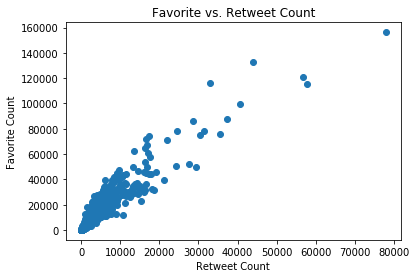

In [68]:
plt.scatter(df_master['retweet_count'], df_master['favorite_count']);
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
plt.title('Favorite vs. Retweet Count');

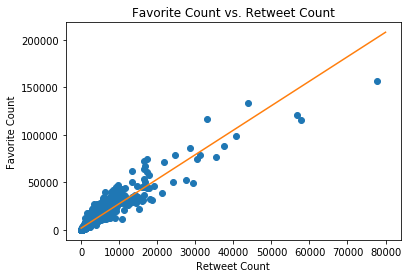

In [69]:
## show the line that was fit

xi = arange(0,80000)
A = array([ xi, ones(80000)])

# (Almost) linear sequence
y = df_master['favorite_count']
x = df_master['retweet_count']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept
 
plt.plot(x, y, 'o', xi, line);
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
pylab.title('Favorite Count vs. Retweet Count');

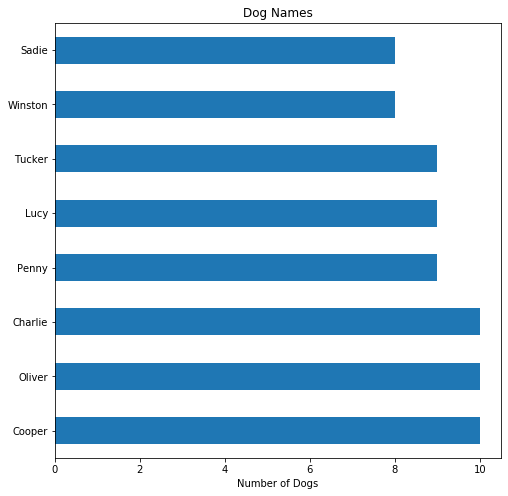

In [70]:
#create a horizontal bar plot for most common dog names on WeRateDogs counts without 'none`.
df_master.name.value_counts()[1:9].plot(kind = 'barh', figsize=(8,8), title='Dog Names').set_xlabel("Number of Dogs");

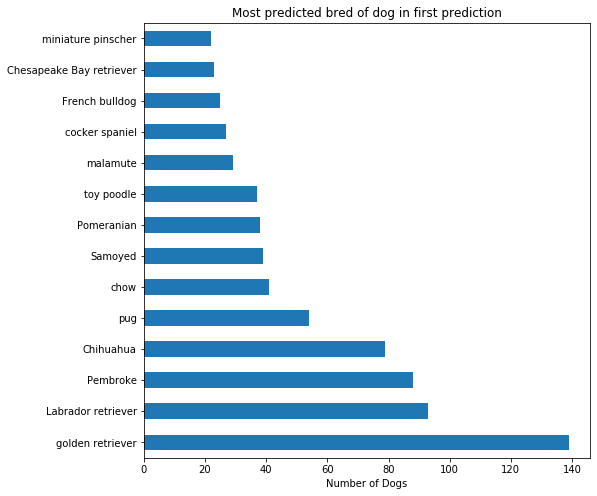

In [71]:
df_master.p1.value_counts()[0:14].plot(kind = 'barh', figsize=(8,8), title='Most predicted bred of dog in first prediction').set_xlabel("Number of Dogs");

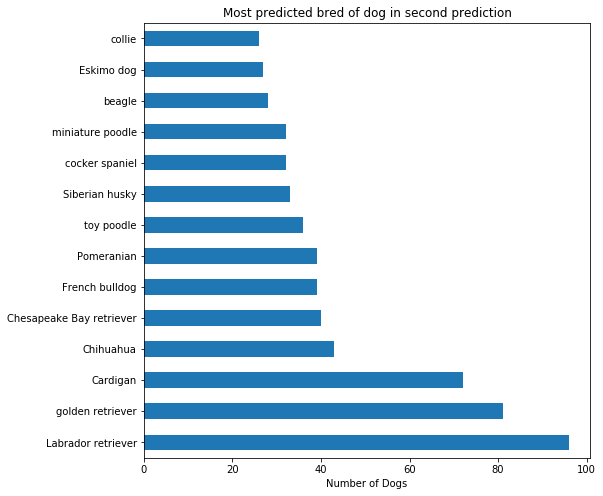

In [72]:
df_master.p2.value_counts()[0:14].plot(kind = 'barh', figsize=(8,8), title='Most predicted bred of dog in second prediction').set_xlabel("Number of Dogs");

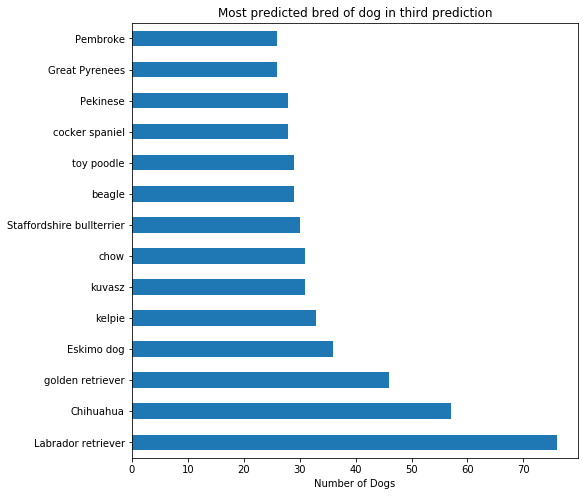

In [73]:
df_master.p3.value_counts()[0:14].plot(kind = 'barh', figsize=(8,8), title='Most predicted bred of dog in third prediction').set_xlabel("Number of Dogs");